<a href="https://colab.research.google.com/github/majorquev/DBDC_202304_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [2]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(nycflights13)


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

In [4]:
# Histograma de frecuencias relativas
set.seed(15)
data<-data.frame(x = rnorm(1000))



In [5]:
head(data)

,x
,<dbl>
1,0.2588229
2,1.8311207
3,-0.3396186
4,0.8971982
5,0.4880163
6,-1.2553858


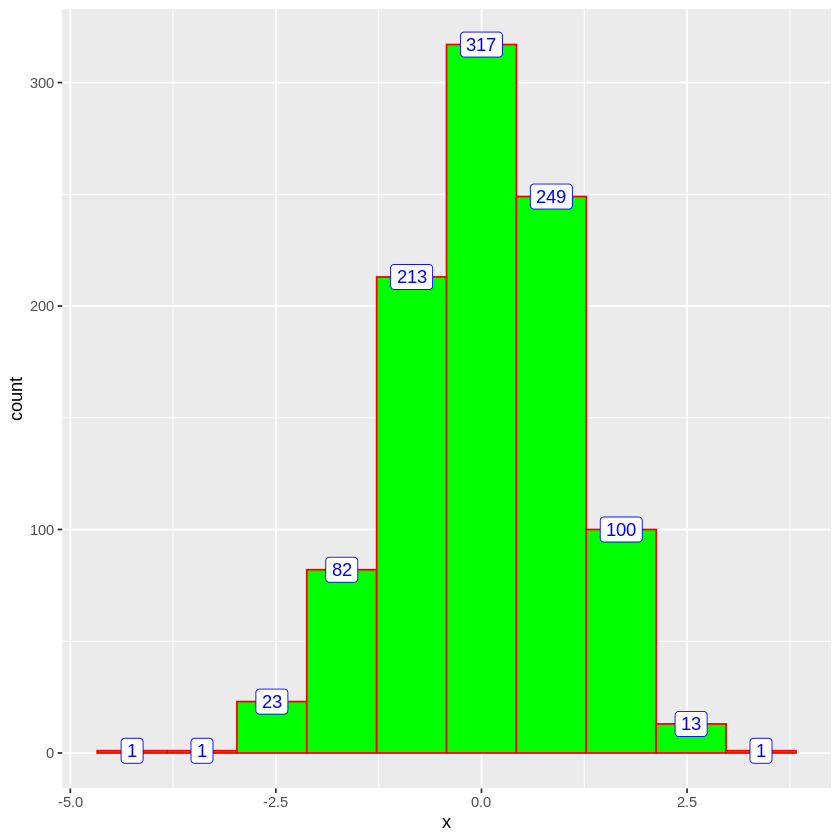

In [13]:
data %>%
  ggplot()+
  aes(x = x) +
  geom_histogram(
    bins = 10,
    fill = "green",
    col = "red"
  ) +
  stat_bin(
    bins = 10,
    geom = 'label',
    color = 'blue',
    mapping = aes(label = after_stat(count)),
    position = position_stack(vjust = 1)
  )

2.- Misma Visualización pero con histograma de frecuencias relativas.

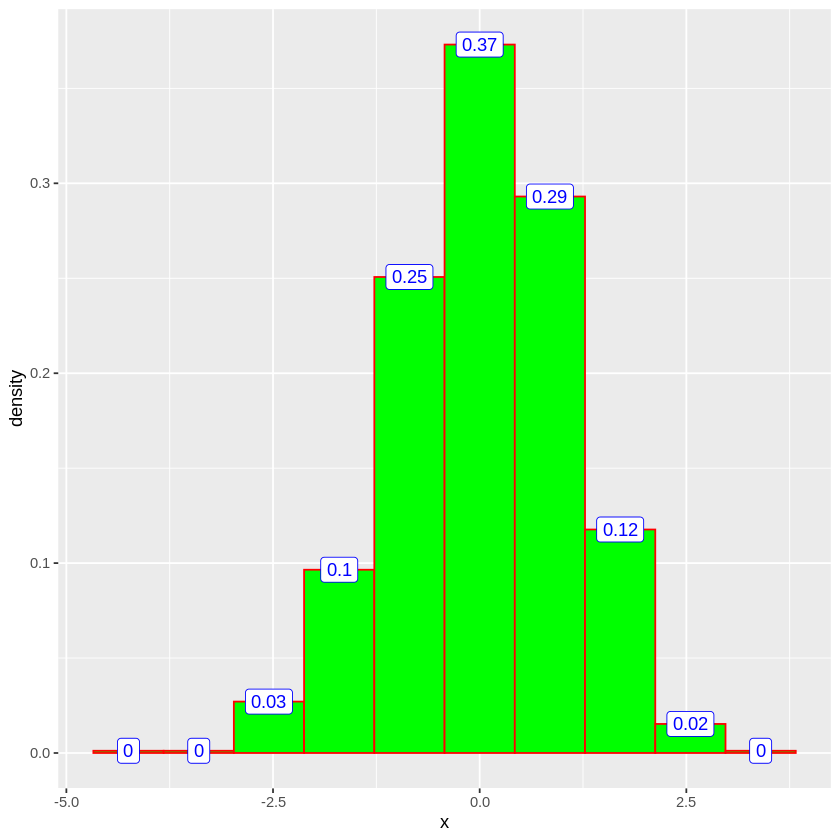

In [24]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma
data %>%
  ggplot()+
  aes(x = x, y = after_stat(density)) +
  geom_histogram(
    bins = 10,
    fill = "green",
    col = "red"
  ) +
  stat_bin(
    bins = 10,
    geom = 'label',
    color = 'blue',
    mapping = aes(label = round(after_stat(density),2) ),
    position = position_stack(vjust = 1)
  )


## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día. 
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

In [ ]:

# Orientación etiquetas ejes ----------------------------------------------
data(flights)


In [26]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


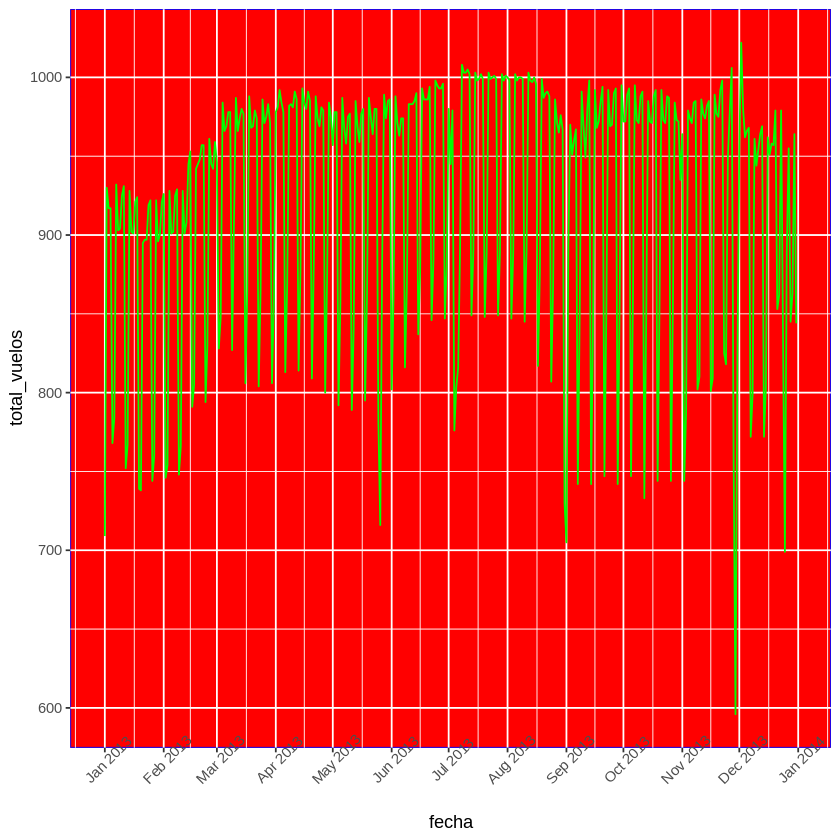

In [40]:

# A modo de ejemplo podemos visulizar el total de vuelos por día .
flights %>%
  mutate(fecha = as.Date(time_hour)) %>%
  filter(fecha <= "2013-12-31") %>%
  group_by(fecha) %>%
  summarise(total_vuelos = n()) %>% 
  ggplot() +
  aes(x = fecha, y = total_vuelos) +
  geom_line(color = "green") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  theme(
    axis.text.x = element_text(angle = 45),
    panel.background = element_rect(fill = "red", colour = "blue")
  )

# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

Por cada aeropuerto de origen, mostrar el total de vuelos hacia cada aeropuerto de destino, en un gráfico de barras tipo "dodge". Para los 4 aeropuertos con mayor cantidad de vuelos.



In [ ]:
data(flights)

In [41]:
?count

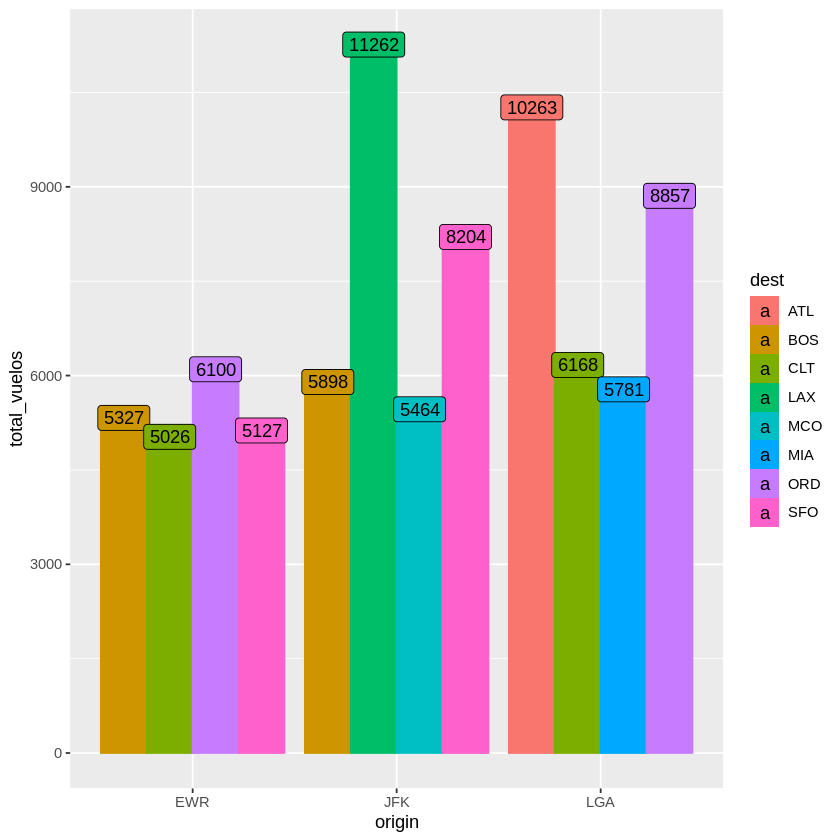

In [69]:
# Contamos con las capas geom_label y geom_text ---------------------------------
# Para ello visualizaremos los 4 aeropuertos de destino con mayor cantidad de vuelos, por cada aeropuerto de origen


# conteo por origen destino -----------------------------------------------------
flights %>%
  count(origin, dest, name = "total_vuelos") %>% 
  group_by(origin) %>%
  top_n(4,wt = total_vuelos) %>%
  ggplot() +
  aes(x = origin, y = total_vuelos, color = dest, fill = dest)+
  geom_bar(stat = "identity",
           position = position_dodge(width = 0.9)) +
  geom_label(mapping = aes(label = total_vuelos), 
             color = "black",
             position = position_dodge(width = 0.9))

# 4 aeropuertos de destino, con mayor cantidad de vuelos por cada origen --------


In [62]:
?position_dodge